# Stock Market Prediction



In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from sklearn.metrics import mean_squared_error
import sklearn.metrics as metrics
from sklearn.preprocessing import MinMaxScaler
import os
for dirname, _,filenames in os.walk('StockMarket.csv'):
    for filename in filenames:
        print(os.path.join(dirname,filename))

In [2]:
data=pd.read_csv('StockMarket.csv')

In [3]:
data

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,08-10-2018,208.00,222.25,206.85,216.00,215.15,4642146,10062.83
1,05-10-2018,217.00,218.60,205.90,210.25,209.20,3519515,7407.06
2,04-10-2018,223.50,227.80,216.15,217.25,218.20,1728786,3815.79
3,03-10-2018,230.00,237.50,225.75,226.45,227.60,1708590,3960.27
4,01-10-2018,234.55,234.60,221.05,230.30,230.90,1534749,3486.05
...,...,...,...,...,...,...,...,...
1230,14-10-2013,160.85,161.45,157.70,159.30,159.45,1281419,2039.09
1231,11-10-2013,161.15,163.45,159.00,159.80,160.05,1880046,3030.76
1232,10-10-2013,156.00,160.80,155.85,160.30,160.15,3124853,4978.80
1233,09-10-2013,155.70,158.20,154.15,155.30,155.55,2049580,3204.49


In [4]:
# About Dataset
data.describe()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
count,1235.000000,1235.000000,1235.000000,1235.000000,1235.000000,1.235000e+03,1235.000000
mean,168.954858,171.429069,166.402308,168.736356,168.731053,2.604151e+06,4843.166502
std,51.499145,52.436761,50.542919,51.587384,51.544928,2.277028e+06,5348.919832
min,103.000000,104.600000,100.000000,102.600000,102.650000,1.001800e+05,128.040000
25%,137.550000,138.925000,135.250000,137.175000,137.225000,1.284482e+06,1801.035000
50%,151.500000,153.250000,149.500000,151.200000,151.100000,1.964885e+06,3068.510000
75%,169.000000,172.325000,166.700000,169.100000,169.500000,3.095788e+06,5852.600000
max,327.700000,328.750000,321.650000,325.950000,325.750000,2.919102e+07,55755.080000


In [5]:
data.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,08-10-2018,208.00,222.25,206.85,216.00,215.15,4642146,10062.83
1,05-10-2018,217.00,218.60,205.90,210.25,209.20,3519515,7407.06
2,04-10-2018,223.50,227.80,216.15,217.25,218.20,1728786,3815.79
3,03-10-2018,230.00,237.50,225.75,226.45,227.60,1708590,3960.27
4,01-10-2018,234.55,234.60,221.05,230.30,230.90,1534749,3486.05


In [6]:
data.tail()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
1230,14-10-2013,160.85,161.45,157.70,159.3,159.45,1281419,2039.09
1231,11-10-2013,161.15,163.45,159.00,159.8,160.05,1880046,3030.76
1232,10-10-2013,156.00,160.80,155.85,160.3,160.15,3124853,4978.80
1233,09-10-2013,155.70,158.20,154.15,155.3,155.55,2049580,3204.49
1234,08-10-2013,157.00,157.80,155.20,155.8,155.80,1720413,2688.94


In [7]:
data.dtypes

Date                     object
Open                    float64
High                    float64
Low                     float64
Last                    float64
Close                   float64
Total Trade Quantity      int64
Turnover (Lacs)         float64
dtype: object

<AxesSubplot:>

<Figure size 1440x576 with 0 Axes>

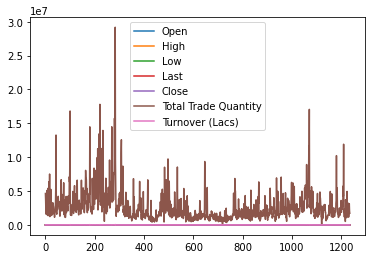

In [8]:
plt.figure(figsize=(20,8))
data.plot()

In [9]:
data['Date'].value_counts()

08-10-2018    1
15-06-2015    1
04-06-2015    1
05-06-2015    1
08-06-2015    1
             ..
09-02-2017    1
10-02-2017    1
13-02-2017    1
14-02-2017    1
08-10-2013    1
Name: Date, Length: 1235, dtype: int64

In [10]:
#converting int64 dtype to datetime64 dtype
data['Date']=pd.to_datetime(data['Date'])

C:\Users\chitt\AppData\Local\Temp\ipykernel_3664\1675040099.py:2: UserWarning: Parsing '28-09-2018' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  data['Date']=pd.to_datetime(data['Date'])
C:\Users\chitt\AppData\Local\Temp\ipykernel_3664\1675040099.py:2: UserWarning: Parsing '27-09-2018' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  data['Date']=pd.to_datetime(data['Date'])
C:\Users\chitt\AppData\Local\Temp\ipykernel_3664\1675040099.py:2: UserWarning: Parsing '26-09-2018' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  data['Date']=pd.to_datetime(data['Date'])
C:\Users\chitt\AppData\Local\Temp\ipykernel_3664\1675040099.py:2: UserWarning: Parsing '25-09-2018' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  data['Date']=pd.to_datetime(data['Date'])
C:\Users\chitt\AppData\Local

In [11]:
data['Date']

0      2018-08-10
1      2018-05-10
2      2018-04-10
3      2018-03-10
4      2018-01-10
          ...    
1230   2013-10-14
1231   2013-11-10
1232   2013-10-10
1233   2013-09-10
1234   2013-08-10
Name: Date, Length: 1235, dtype: datetime64[ns]

In [12]:
# sorting dataset with respect to dates

data=data.sort_values(by="Date")

In [13]:
data

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
1217,2013-01-11,164.00,169.90,161.55,168.30,167.70,3726470,6227.17
1197,2013-02-12,149.20,150.90,149.00,149.25,149.30,2063513,3091.19
1216,2013-03-11,168.00,170.00,167.25,169.50,169.50,512878,868.66
1196,2013-03-12,149.00,149.30,146.25,146.70,146.80,2227417,3286.14
1195,2013-04-12,146.50,148.40,145.10,145.90,145.55,1547460,2267.72
...,...,...,...,...,...,...,...,...
142,2018-12-03,270.00,276.65,269.70,276.00,276.05,2583575,7052.02
121,2018-12-04,273.90,277.80,271.65,273.90,273.85,2149205,5896.21
79,2018-12-06,262.75,268.40,262.75,267.20,267.60,1206633,3209.40
57,2018-12-07,270.40,272.45,264.35,264.50,265.20,2250217,6045.37


In [14]:
data.reset_index(inplace=True)

In [15]:
data

,index,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,1217,2013-01-11,164.00,169.90,161.55,168.30,167.70,3726470,6227.17
1,1197,2013-02-12,149.20,150.90,149.00,149.25,149.30,2063513,3091.19
2,1216,2013-03-11,168.00,170.00,167.25,169.50,169.50,512878,868.66
3,1196,2013-03-12,149.00,149.30,146.25,146.70,146.80,2227417,3286.14
4,1195,2013-04-12,146.50,148.40,145.10,145.90,145.55,1547460,2267.72
...,...,...,...,...,...,...,...,...,...
1230,142,2018-12-03,270.00,276.65,269.70,276.00,276.05,2583575,7052.02
1231,121,2018-12-04,273.90,277.80,271.65,273.90,273.85,2149205,5896.21
1232,79,2018-12-06,262.75,268.40,262.75,267.20,267.60,1206633,3209.40
1233,57,2018-12-07,270.40,272.45,264.35,264.50,265.20,2250217,6045.37


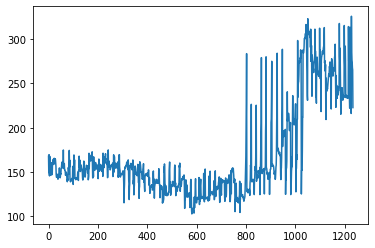

In [16]:
plt.plot(data['Close'])

<AxesSubplot:>

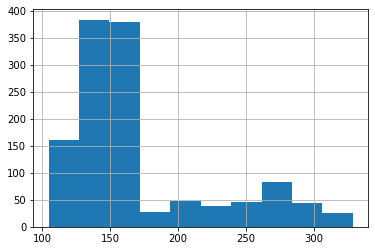

In [17]:
data['High'].hist()

In [18]:
d1=data['Close']

In [19]:
# performing feature scaling on d1
scaler=MinMaxScaler(feature_range=(0,1))
d1=scaler.fit_transform(np.array(d1).reshape(-1,1))


In [20]:
d1

array([[0.29157329],
       [0.20909906],
       [0.29964142],
       ...,
       [0.73935455],
       [0.72859704],
       [0.53787539]])

In [21]:
training_size=int(len(d1)*0.70)
test_size=len(d1)-training_size

In [22]:
train_data=d1[0:training_size,:]

In [23]:
test_data=d1[training_size:len(d1),:1]

In [24]:
train_data

array([[0.29157329],
       [0.20909906],
       [0.29964142],
       [0.19789332],
       [0.19229045],
       [0.29112506],
       [0.19722098],
       [0.27297176],
       [0.19520394],
       [0.25862842],
       [0.23823398],
       [0.25750784],
       [0.2371134 ],
       [0.19744509],
       [0.25773196],
       [0.20080681],
       [0.25459435],
       [0.24831914],
       [0.2660242 ],
       [0.27588525],
       [0.2552667 ],
       [0.26535186],
       [0.25145675],
       [0.28148812],
       [0.27431645],
       [0.27162707],
       [0.26781712],
       [0.27947109],
       [0.27498879],
       [0.25728373],
       [0.2415957 ],
       [0.19878978],
       [0.18668758],
       [0.18511878],
       [0.20192739],
       [0.18780816],
       [0.19139399],
       [0.18377409],
       [0.17548185],
       [0.17817122],
       [0.19206634],
       [0.19004931],
       [0.20170327],
       [0.20730614],
       [0.23263111],
       [0.19766921],
       [0.19049753],
       [0.182

In [25]:
test_data

array([[0.21447781],
       [0.2097714 ],
       [0.20394442],
       [0.21313312],
       [0.2218736 ],
       [0.21806365],
       [0.22097714],
       [0.21985657],
       [0.22904527],
       [0.22164948],
       [0.22613178],
       [0.10107575],
       [0.22411475],
       [0.22254594],
       [0.23442403],
       [0.23980278],
       [0.42155984],
       [0.4787091 ],
       [0.79471089],
       [0.23285522],
       [0.23218288],
       [0.22501121],
       [0.20103093],
       [0.20999552],
       [0.20237562],
       [0.18870462],
       [0.17503362],
       [0.18108472],
       [0.19834155],
       [0.19161811],
       [0.19229045],
       [0.20954729],
       [0.09861049],
       [0.17974003],
       [0.18198117],
       [0.22590766],
       [0.22568355],
       [0.22725235],
       [0.46302107],
       [0.47938144],
       [0.59188705],
       [0.77229942],
       [0.24114747],
       [0.25011206],
       [0.25302555],
       [0.24899148],
       [0.24092335],
       [0.242

In [26]:
def datasetcrtd(dataset,time_step):
  datax,datay=[],[]
  for i in range(len(dataset)-time_step-1):
    a=dataset[i:(i+time_step),0]
    datax.append(a)
    datay.append(dataset[i+time_step,0])
  return np.array(datax),np.array(datay)

In [27]:
df_testing_complete=pd.read_csv('StockMarket.csv')

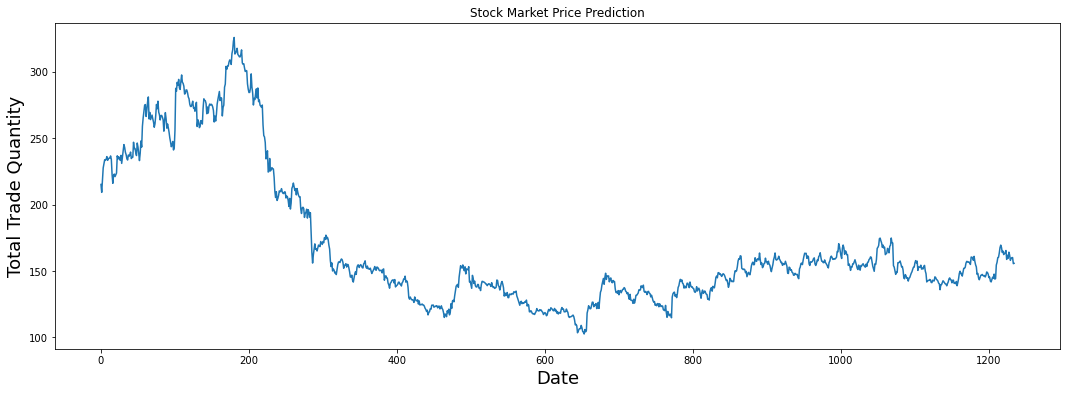

In [28]:
plt.figure(figsize=(18,6))
plt.title("Stock Market Price Prediction")
plt.plot(df_testing_complete['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Total Trade Quantity', fontsize=18)
plt.show()

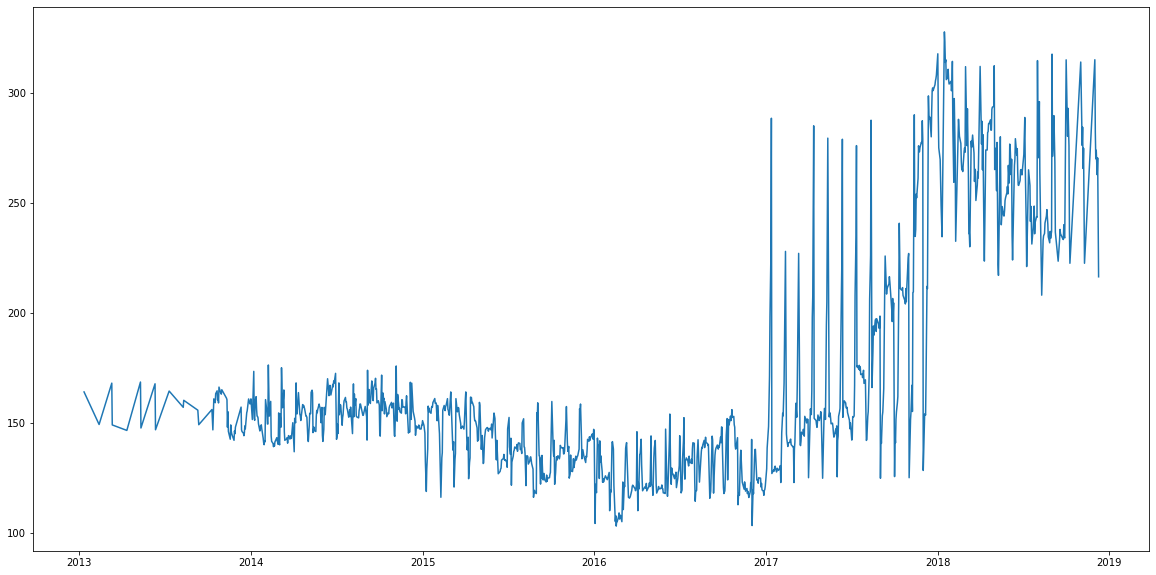

In [29]:
data.index = data['Date']
plt.figure(figsize=(20, 10))
plt.plot(data["Open"], label='ClosePriceHist')

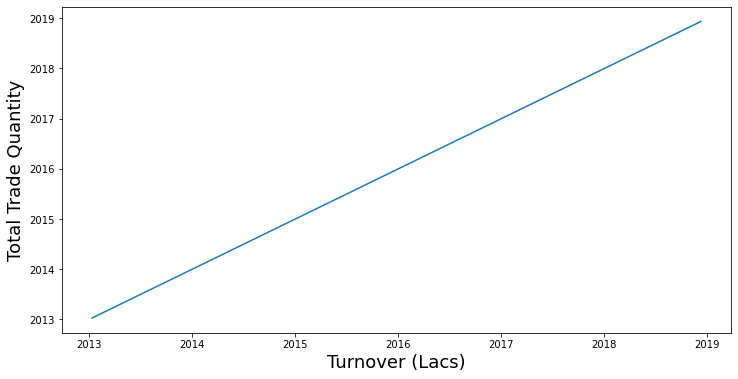

In [30]:
plt.figure(figsize=(12,6))
plt.plot(data['Date'])
plt.xlabel('Turnover (Lacs)', fontsize=18)
plt.ylabel('Total Trade Quantity', fontsize=18)
plt.show()

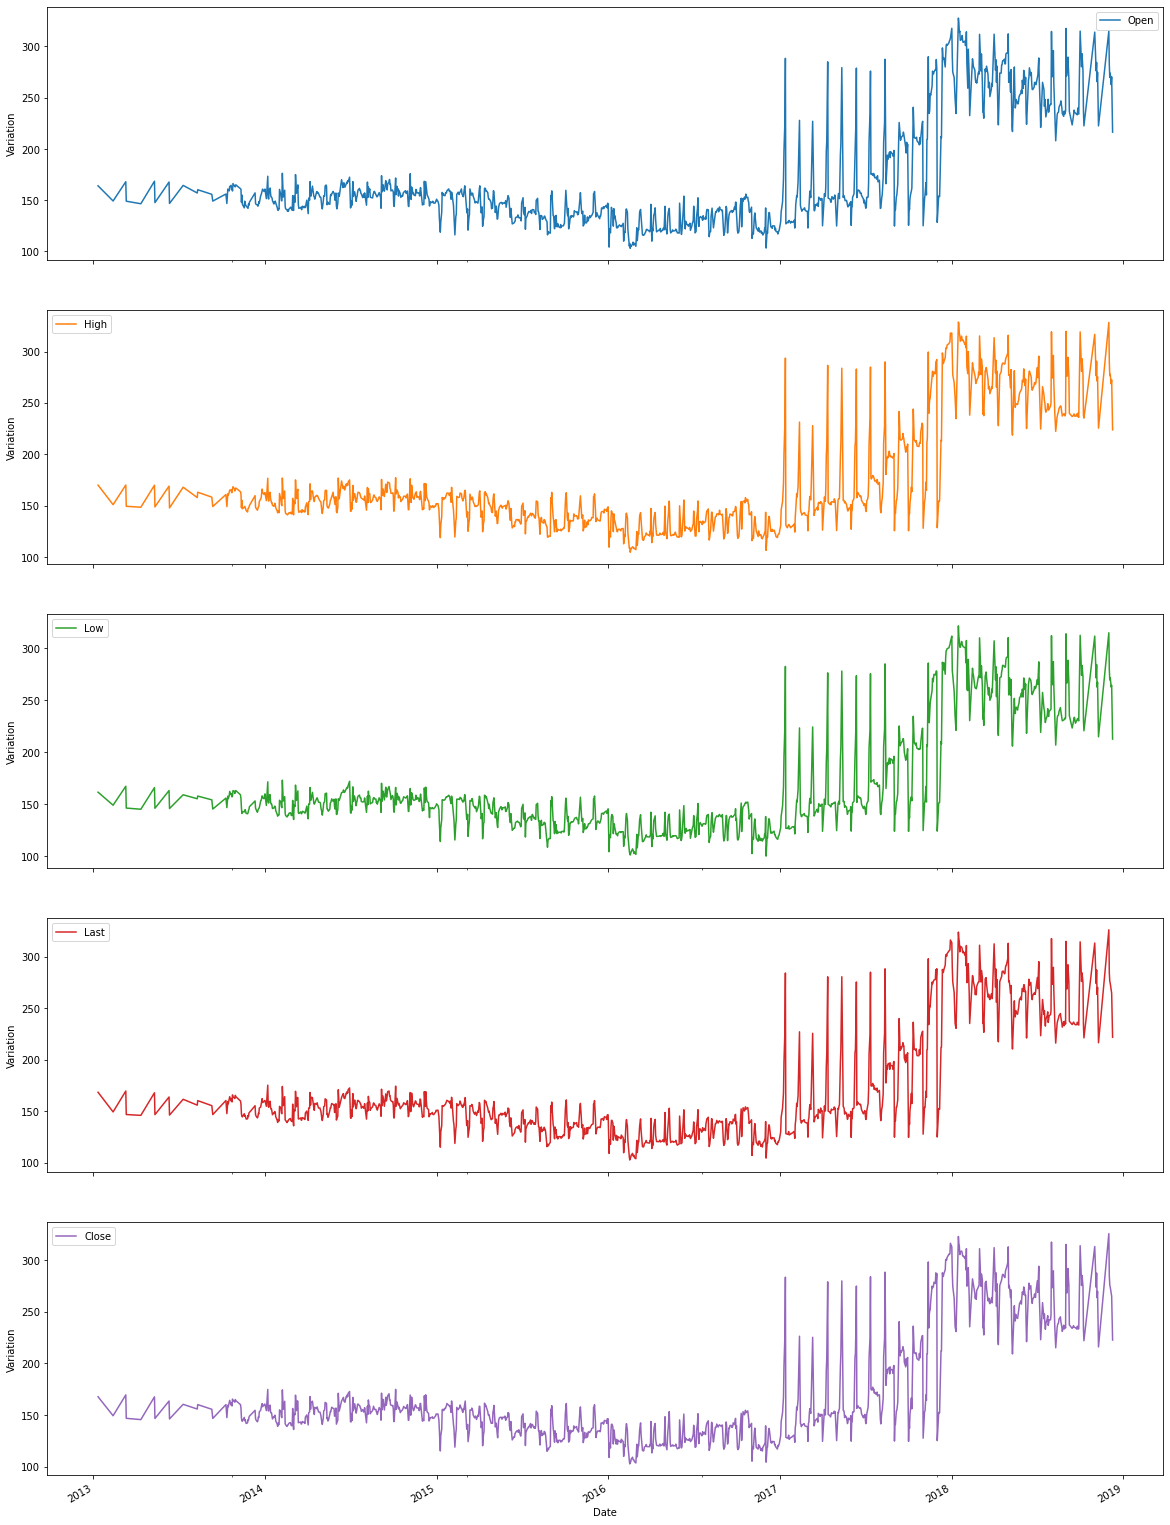

In [31]:
cols_plot = ['Open','High','Low','Last','Close']
axes = data[cols_plot].plot(alpha = 1, figsize=(20, 30), subplots = True)
for i in axes:
    i.set_ylabel('Variation')